# NFL Elimination Picks 2025

reqs:
```
pip install requests numpy scipy pandas matplotlib parsel
```

In [1]:
import datetime
import math
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#%load_ext autoreload
#%autoreload 2

In [3]:
import anysunday
import anysunday.powercalcs
from anysunday import viz, pick

In [4]:
schedule = anysunday.loaders.espn_schedule("./schedules/2025.espn")

https://www.espn.com/nfl/fpi

In [5]:
powers = anysunday.loaders.espn_powers()
pd.DataFrame(powers.items()).T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,BAL,PHI,GB,BUF,KC,LAC,DET,WSH,LAR,TB,...,ATL,NYJ,SF,NE,MIA,CLE,NYG,CAR,NO,TEN
1,7.2,5.1,5.0,4.7,4.6,3.8,2.8,2.1,1.7,1.6,...,-2.9,-3.0,-3.2,-3.2,-3.8,-4.3,-4.4,-5.5,-5.6,-6.4


In [6]:
picks = [
    "DEN", # week 1
    # "BAL", # week 2
]

(<Figure size 800x1000 with 2 Axes>,
 <Axes: xlabel='Week', ylabel='Pick to Win'>)

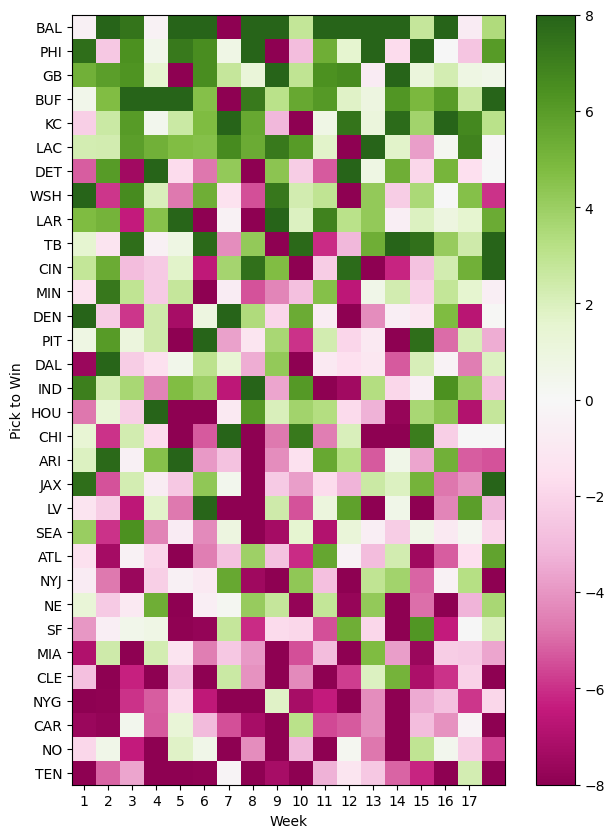

In [7]:
power_rank, matrix = anysunday.powercalcs.pick_grid(powers, schedule, home_bump=3)

viz.plot_matrix(matrix, power_rank)

In [8]:
tuned_home_bump = 3  # default is 3

ppkwargs = {
    "powers": powers,
    "schedule": schedule,
    "home_bump": tuned_home_bump,
    "past_picks": picks
}

In [9]:
pp = pick.Permuter(**ppkwargs)

pprev = pick.Permuter(**ppkwargs)
pprev.pick = pprev.reverse_greedy()

pprand = pick.Permuter(**ppkwargs)
pprand.pick = pprand.random_greedy()

pplg = pick.Permuter(**ppkwargs)
pplg.pick = pplg.limited_greedy(limit=8)

In [10]:
pp.describe_pick()

week  2: diff +14.5 - picking BAL (+7.2+H) over CLE (-4.3  )
week  3: diff +11.5 - picking BUF (+4.7+H) over MIA (-3.8  )
week  4: diff +10.1 - picking DET (+2.8+H) over CLE (-4.3  )
week  5: diff  +8.7 - picking ARI (-0.7+H) over TEN (-6.4  )
week  6: diff  +8.1 - picking PIT (+0.8+H) over CLE (-4.3  )
week  7: diff  +9.1 - picking KC  (+4.6+H) over LV  (-1.5  )
week  8: diff +12.5 - picking PHI (+5.1+H) over NYG (-4.4  )
week  9: diff +13.5 - picking GB  (+5.0+H) over CAR (-5.5  )
week 10: diff  +7.8 - picking TB  (+1.6+H) over NE  (-3.2  )
week 11: diff  +6.9 - picking LAR (+1.7+H) over SEA (-2.2  )
week 12: diff  +7.7 - picking CIN (+1.5+H) over NE  (-3.2  )
week 13: diff  +8.3 - picking LAC (+3.8+H) over LV  (-1.5  )
week 14: diff  +5.1 - picking CLE (-4.3+H) over TEN (-6.4  )
week 15: diff  +7.1 - picking CHI (-0.2+H) over CLE (-4.3  )
week 16: diff  +6.4 - picking IND (+0.2+H) over SF  (-3.2  )
week 17: diff  +5.9 - picking LV  (-1.5+H) over NYG (-4.4  )
week 18: diff  +8.5 - pi

In [11]:
pprev.describe_pick()

week  2: diff  +7.9 - picking DAL (+0.5+H) over NYG (-4.4  )
week  3: diff  +6.6 - picking WSH (+2.1+H) over LV  (-1.5  )
week  4: diff  +9.3 - picking HOU (-0.1+H) over TEN (-6.4  )
week  5: diff  +8.7 - picking ARI (-0.7+H) over TEN (-6.4  )
week  6: diff  +8.1 - picking PIT (+0.8+H) over CLE (-4.3  )
week  7: diff  +9.1 - picking KC  (+4.6+H) over LV  (-1.5  )
week  8: diff  +9.6 - picking IND (+0.2+H) over TEN (-6.4  )
week  9: diff +13.5 - picking GB  (+5.0+H) over CAR (-5.5  )
week 10: diff  +7.2 - picking CHI (-0.2+H) over NYG (-4.4  )
week 11: diff  +6.9 - picking LAR (+1.7+H) over SEA (-2.2  )
week 12: diff +10.2 - picking DET (+2.8+H) over NYG (-4.4  )
week 13: diff  +4.8 - picking MIA (-3.8+H) over NO  (-5.6  )
week 14: diff +10.2 - picking TB  (+1.6+H) over NO  (-5.6  )
week 15: diff  +9.6 - picking PHI (+5.1+H) over LV  (-1.5  )
week 16: diff +13.4 - picking BAL (+7.2+H) over NE  (-3.2  )
week 17: diff  +6.9 - picking LAC (+3.8+H) over HOU (-0.1  )
week 18: diff +10.7 - pi

In [12]:
pprand.describe_pick()

week  2: diff +14.5 - picking BAL (+7.2+H) over CLE (-4.3  )
week  3: diff +11.5 - picking BUF (+4.7+H) over MIA (-3.8  )
week  4: diff  +9.3 - picking HOU (-0.1+H) over TEN (-6.4  )
week  5: diff  +8.7 - picking ARI (-0.7+H) over TEN (-6.4  )
week  6: diff  +7.9 - picking LV  (-1.5+H) over TEN (-6.4  )
week  7: diff  +8.4 - picking CHI (-0.2+H) over NO  (-5.6  )
week  8: diff  +9.6 - picking IND (+0.2+H) over TEN (-6.4  )
week  9: diff +13.5 - picking GB  (+5.0+H) over CAR (-5.5  )
week 10: diff  +4.3 - picking NYJ (-3.0+H) over CLE (-4.3  )
week 11: diff  +6.9 - picking LAR (+1.7+H) over SEA (-2.2  )
week 12: diff +10.2 - picking DET (+2.8+H) over NYG (-4.4  )
week 13: diff  +8.3 - picking PHI (+5.1+H) over CHI (-0.2  )
week 14: diff +10.2 - picking TB  (+1.6+H) over NO  (-5.6  )
week 15: diff  +7.6 - picking PIT (+0.8+H) over MIA (-3.8  )
week 16: diff  +8.0 - picking KC  (+4.6  ) over TEN (-6.4+H)
week 17: diff  +6.9 - picking LAC (+3.8+H) over HOU (-0.1  )
week 18: diff  +8.8 - pi

In [13]:
pplg.describe_pick()

week  2: diff +14.5 - picking BAL (+7.2+H) over CLE (-4.3  )
week  3: diff +11.5 - picking BUF (+4.7+H) over MIA (-3.8  )
week  4: diff  +9.3 - picking HOU (-0.1+H) over TEN (-6.4  )
week  5: diff  +8.7 - picking ARI (-0.7+H) over TEN (-6.4  )
week  6: diff  +8.1 - picking PIT (+0.8+H) over CLE (-4.3  )
week  7: diff  +8.4 - picking CHI (-0.2+H) over NO  (-5.6  )
week  8: diff  +9.6 - picking IND (+0.2+H) over TEN (-6.4  )
week  9: diff +10.3 - picking LAR (+1.7+H) over NO  (-5.6  )
week 10: diff  +7.8 - picking TB  (+1.6+H) over NE  (-3.2  )
week 11: diff  +6.4 - picking GB  (+5.0  ) over NYG (-4.4+H)
week 12: diff +10.2 - picking DET (+2.8+H) over NYG (-4.4  )
week 13: diff  +8.3 - picking LAC (+3.8+H) over LV  (-1.5  )
week 14: diff  +7.7 - picking KC  (+4.6+H) over HOU (-0.1  )
week 15: diff  +9.6 - picking PHI (+5.1+H) over LV  (-1.5  )
week 16: diff  +2.8 - picking MIN (+1.4  ) over NYG (-4.4+H)
week 17: diff  +5.9 - picking LV  (-1.5+H) over NYG (-4.4  )
week 18: diff  +8.5 - pi